In [46]:
import pandas as pd
data = pd.read_csv('data/ghana_gdp.csv', parse_dates=["year"], index_col = ["year"])
data.rename(columns = {'GDP (current US$)':'GDP'}, inplace = True )
data.head()

,GDP
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


<AxesSubplot:xlabel='year'>

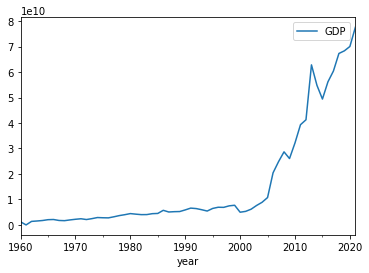

In [47]:
%matplotlib inline 
data.plot()

In [48]:
train_df = data.loc[:"2017-12-31"]
test_df = data.loc["2018-01-01":]
train_df.shape, test_df.shape

((58, 1), (4, 1))

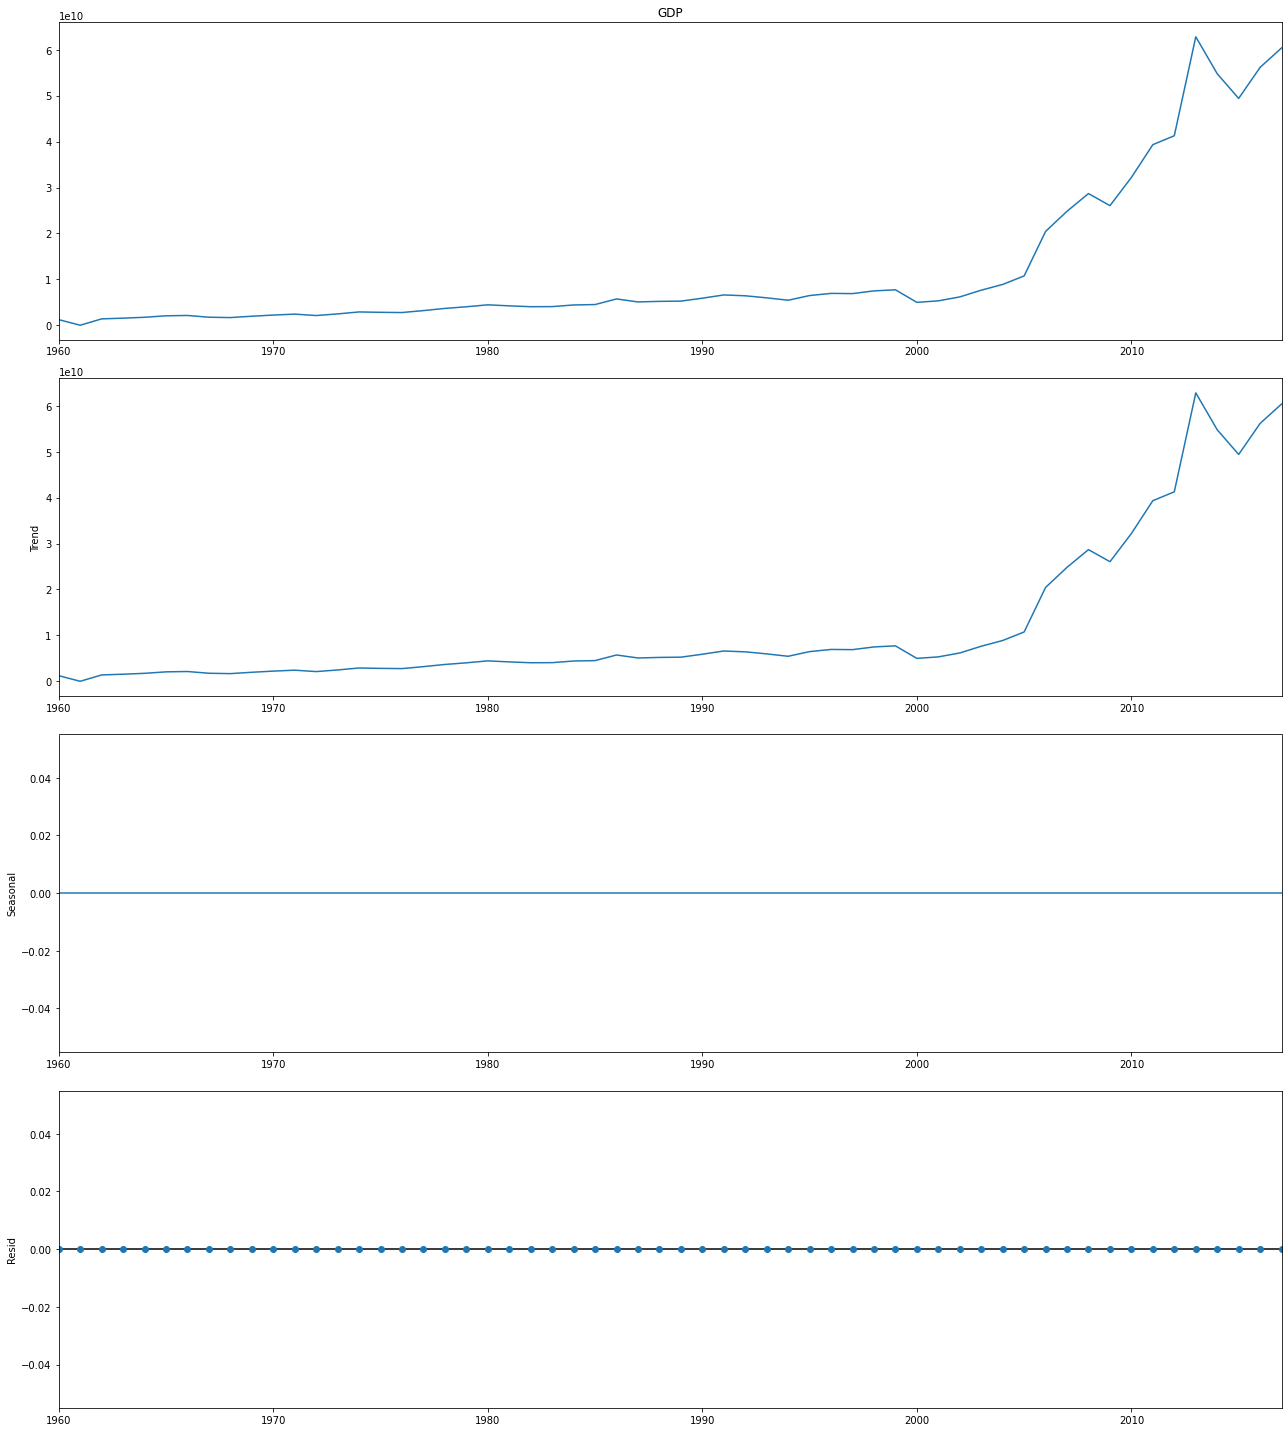

In [49]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 18, 20

result = seasonal_decompose(train_df.GDP, model='additive')
result.plot()
plt.show()

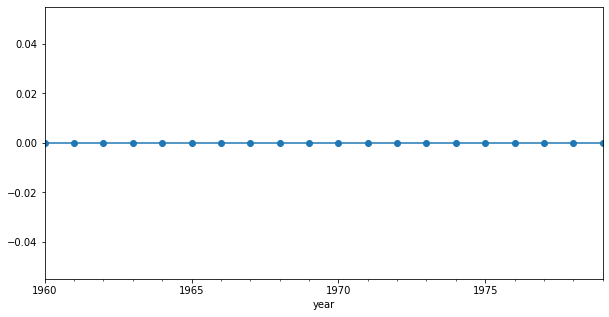

In [50]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker = "o")
plt.show()

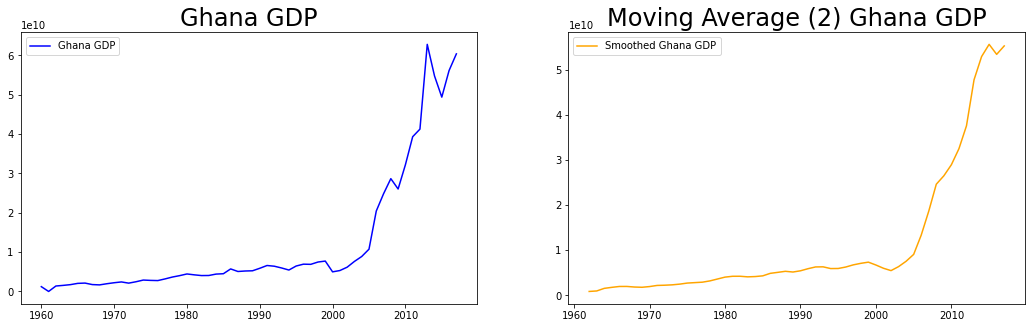

In [51]:
plt.rcParams["figure.figsize"] = 18, 5

fig, ax = plt.subplots(nrows=1, ncols=2)

# Окно в месяц (Window = 3) 
ax[0].plot(train_df.GDP, color = "blue", label = "Ghana GDP")
ax[0].set_title("Ghana GDP", size = 24)
ax[0].legend()

ax[1].plot(train_df.GDP.rolling(window=3).mean(), color = "orange", label = "Smoothed Ghana GDP")
ax[1].set_title("Moving Average (2) Ghana GDP", size = 24)
ax[1].legend()

## Тренд чётко прослеживается

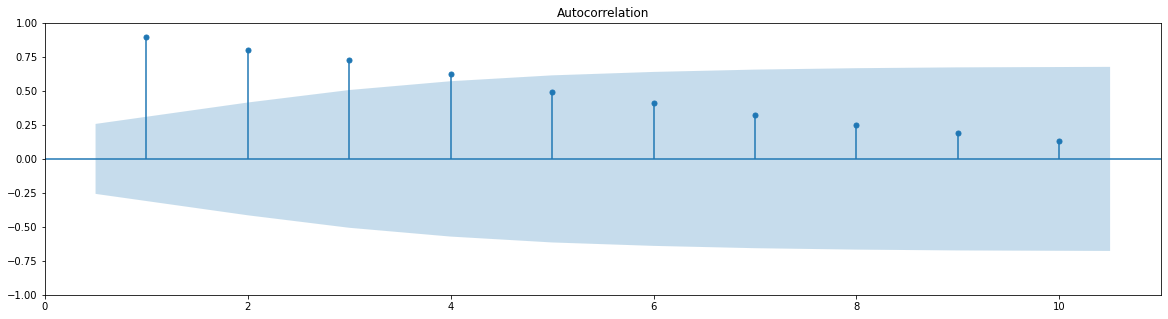

In [52]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df.GDP, zero = False, lags = 10)
plt.show()

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


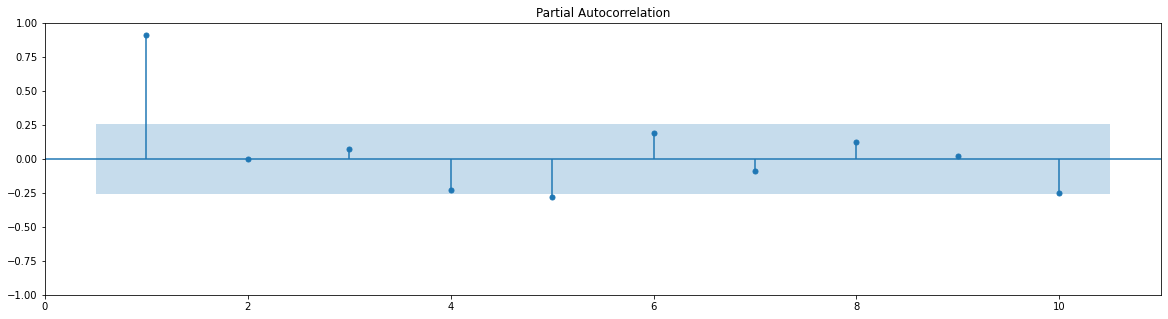

In [53]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.GDP, zero = False, lags = 10)
plt.show()

In [54]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df["GDP"])

(0.5393306248349186,
 0.9860207453998459,
 8,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2146.523587302631)

In [55]:
test1 = adfuller(train_df["GDP"])
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')


adf:  0.5393306248349186
p-value:  0.9860207453998459
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


Статистика теста больше всех критических значений, поэтому нулевую гипотезу ($H_0$) нельзя отвергнуть.

Поэтому показатели ВВП не являются стационарными

In [56]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)
    
    sgt.plot_acf(series, lags = 10, ax = axes[0])
    sgt.plot_pacf(series, lags = 10, ax = axes[1])
    plt.show()

## Дифференцирование ряда
$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Дифференцированное значение ряда $t$
- $y_t$: Фактическое значение ряда $t$
- $y_{t-1}$: Фактическое значение ряда $t-1$

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


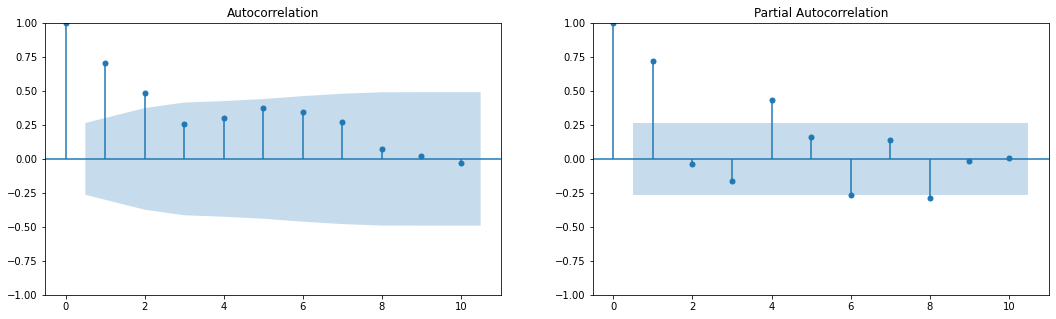

(-2.7881956307520572,
 0.05997982229824655,
 11,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 2003.7416835877664)

In [57]:
plot_acf_pacf(train_df["GDP"].diff(3).dropna())
adfuller(train_df["GDP"].diff(3).dropna())

## ARIMA

Начнем построение модели **ARIMA** со следующими параметрами:

- p = 2 
- d = 3 
- q = 1

In [58]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df["GDP"].dropna(), order = (2, 3, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   58
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -1301.212
Date:                Sun, 12 Mar 2023   AIC                           2610.423
Time:                        21:45:54   BIC                           2618.453
Sample:                    01-01-1960   HQIC                          2613.528
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7622      0.129     -5.905      0.000      -1.015      -0.509
ar.L2         -0.5164      0.240     -2.149      0.032      -0.987      -0.045
ma.L1         -0.9743      0.106     -9.193      0.000      -1.182      -0.767
sigma2      3.044e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               175.50
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):             407.41   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.86e+56. Standard errors may be unstable.
"""

Второй столбец раздела I содержит некоторые полезные показатели, которые используются для сравнения различных моделей ARIMA. Как правило, модель с более высоким логарифмическим правдоподобием или более низким IC (AIC, BIC или HQIC) лучше, и наоборот.

In [59]:
pred_df = pd.DataFrame(index = data.index)
pred_df["model_preds"] = arima_model_fit.predict(start = test_df.index[1], end = test_df.index[-1])


pred_df["GDP"] = data["GDP"]

forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05) # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP"]

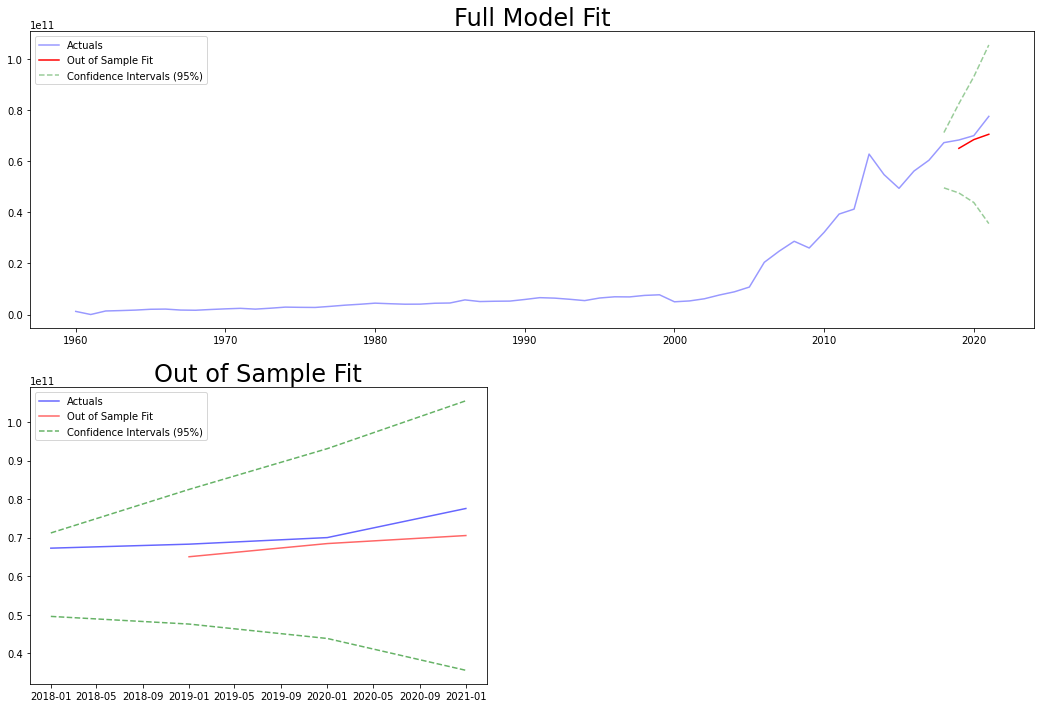

In [60]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["GDP"], color = "blue", label = "Actuals", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit")
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.4)
plt.title("Full Model Fit", size = 24)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(pred_df.loc[test_df.index]["GDP"], color = "blue", label = "Actuals", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.6)
plt.title("Out of Sample Fit", size = 24)
plt.legend()

plt.show()

In [61]:
import pmdarima as pm

smodel = pm.auto_arima(train_df, start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, seasonal=False,
                         d=3, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=2619.511, Time=0.07 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=2686.859, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=2659.570, Time=0.02 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=2610.423, Time=0.05 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=2631.764, Time=0.02 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=2610.925, Time=0.07 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=2627.500, Time=0.03 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=2612.413, Time=0.12 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.891 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(2, 3, 1)   Log Likelihood               -1301.212
Date:                Sun, 12 Mar 2023   AIC                           2610.423
Time:                        21:45:55   BIC                           2618.453
Sample:                    01-01-1960   HQIC                          2613.528
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7622      0.129     -5.905      0.000      -1.015      -0.509
ar.L2         -0.5164      0.240     -2.149      0.032      -0.987      -0.045
ma.L1         -0.9743      0.106     -9.193      0.000      -1.182      -0.767
sigma2      3.044e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               175.50
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):             407.41   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.86e+56. Standard errors may be unstable.
"""

## Downsampling / Upsampling / Интерполяция

In [62]:
data.asfreq(freq='AS')

,GDP
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09
...,...
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10


In [63]:
data.isna().sum()

GDP    0
dtype: int64

In [64]:
import numpy as np
data['GDP'] = data['GDP'].apply(lambda x: np.nan if x==0 else x)

<AxesSubplot:xlabel='year'>

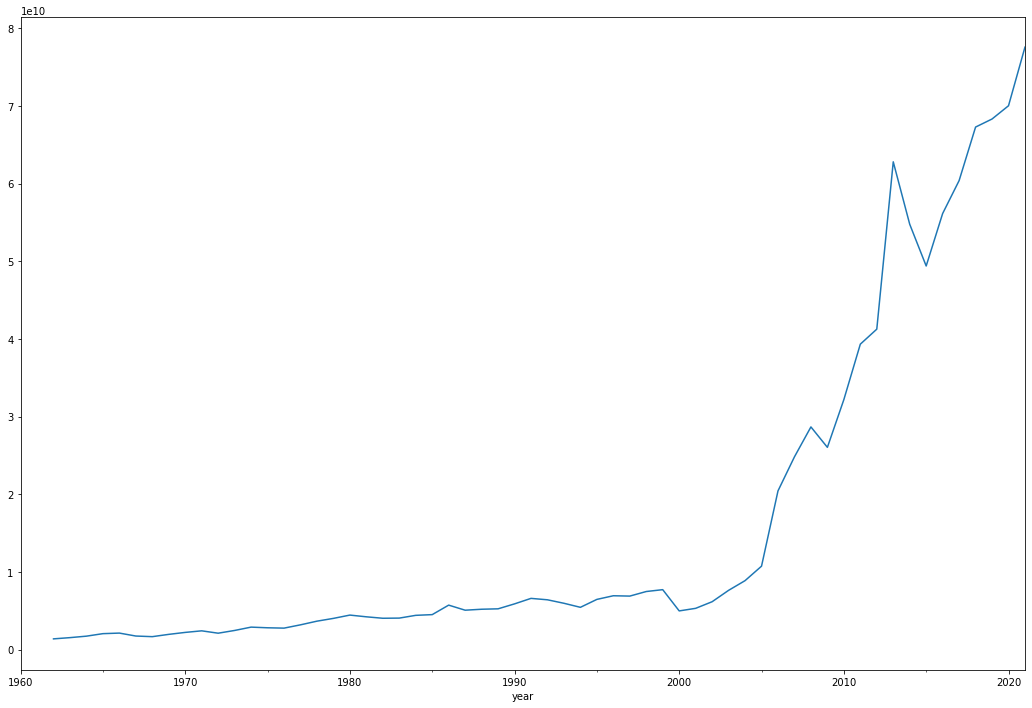

In [65]:
data.GDP.plot()

(62, 1)


<AxesSubplot:xlabel='year'>

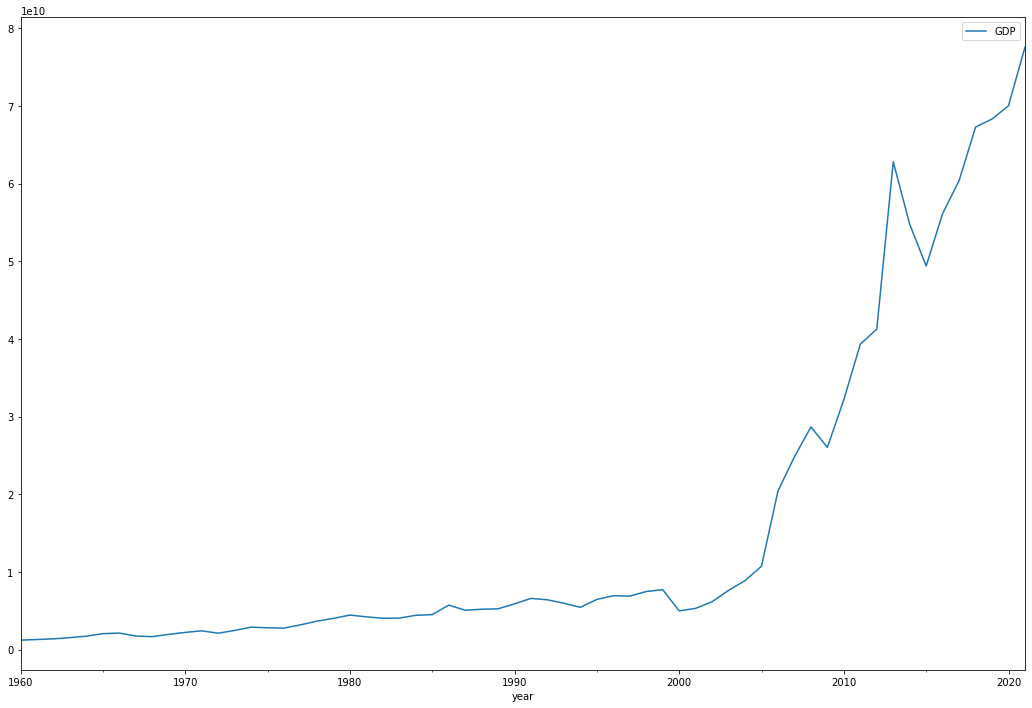

In [66]:
interpolated_data = pd.DataFrame(data.GDP.interpolate(method='linear'), columns = ["GDP"])
print(interpolated_data.shape)
interpolated_data.plot()

In [67]:
interpolated_data.head()

,GDP
year,
1960-01-01,1.217087e+09
1961-01-01,1.299720e+09
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


In [68]:
train_df = interpolated_data.loc[:"2017-12-31"]
test_df = interpolated_data.loc["2018-01-01":]
train_df.shape, test_df.shape

((58, 1), (4, 1))

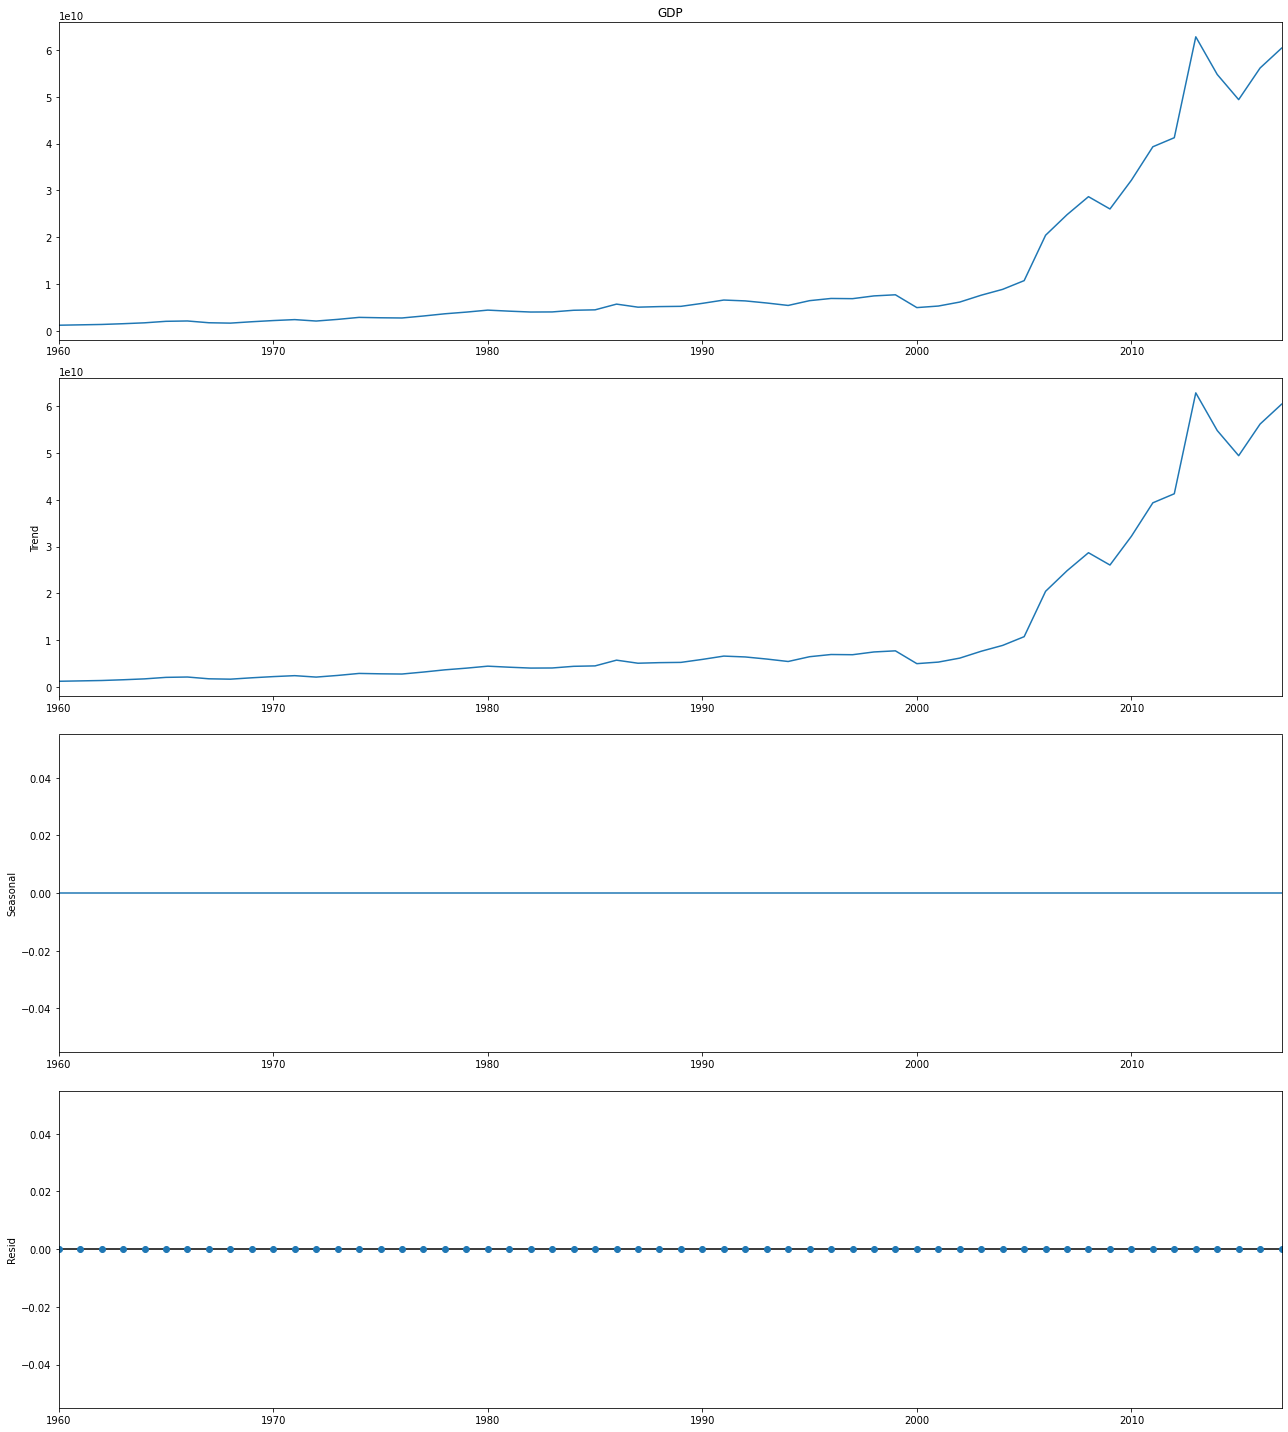

In [69]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 18, 20

result = seasonal_decompose(train_df.GDP, model='additive')
result.plot()
plt.show()

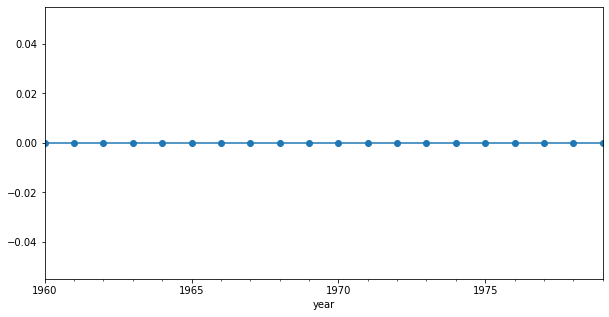

In [70]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker = "o")
plt.show()

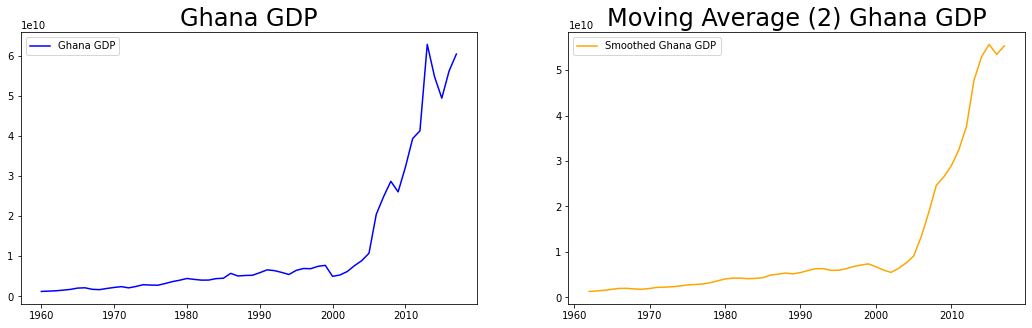

In [71]:
plt.rcParams["figure.figsize"] = 18, 5

fig, ax = plt.subplots(nrows=1, ncols=2)

# Окно в месяц (Window = 3) 
ax[0].plot(train_df.GDP, color = "blue", label = "Ghana GDP")
ax[0].set_title("Ghana GDP", size = 24)
ax[0].legend()

ax[1].plot(train_df.GDP.rolling(window=3).mean(), color = "orange", label = "Smoothed Ghana GDP")
ax[1].set_title("Moving Average (2) Ghana GDP", size = 24)
ax[1].legend()

Тренд чётко прослеживается

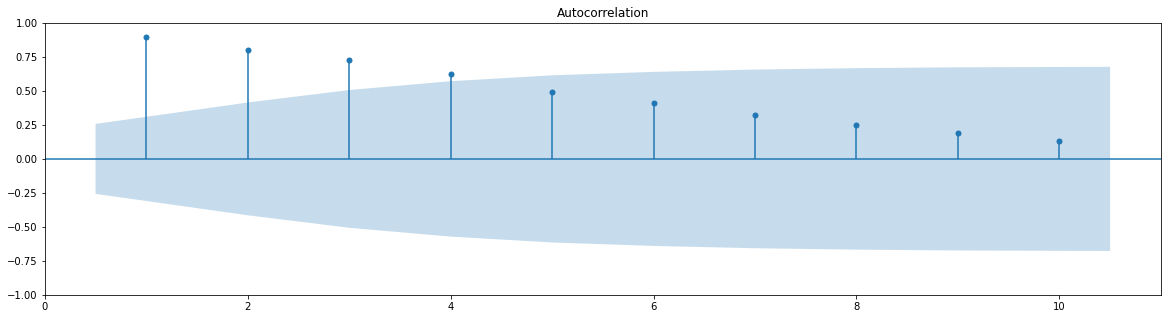

In [72]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df.GDP, zero = False, lags = 10)
plt.show()

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


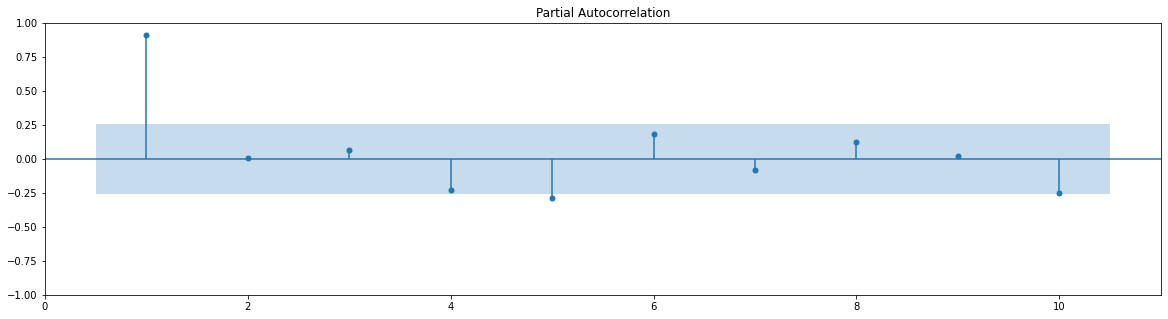

In [73]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.GDP, zero = False, lags = 10)
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df["GDP"])

(0.49636386509276087,
 0.9847621588942816,
 8,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2146.523587302631)

In [75]:
test1 = adfuller(train_df["GDP"])
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')


adf:  0.49636386509276087
p-value:  0.9847621588942816
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


Статистика теста больше всех критических значений, поэтому нулевую гипотезу ($H_0$) нельзя отвергнуть.

Поэтому показатели ВВП не являются стационарными

In [76]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)
    
    sgt.plot_acf(series, lags = 10, ax = axes[0])
    sgt.plot_pacf(series, lags = 10, ax = axes[1])
    plt.show()

## Дифференцирование ряда
$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Дифференцированное значение ряда $t$
- $y_t$: Фактическое значение ряда $t$
- $y_{t-1}$: Фактическое значение ряда $t-1$

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


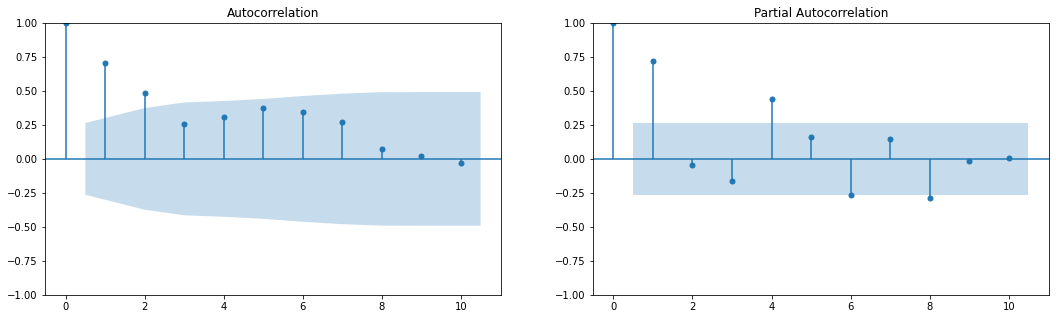

(-2.67108306189477,
 0.07917721579916753,
 10,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 2003.7630152464972)

In [77]:
plot_acf_pacf(train_df["GDP"].diff(3).dropna())
adfuller(train_df["GDP"].diff(3).dropna())

## ARIMA

Начнем построение модели **ARIMA** со следующими параметрами:

- p = 1 
- d = 3 
- q = 2

In [78]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df["GDP"].dropna(), order = (1, 3, 2))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   58
Model:                 ARIMA(1, 3, 2)   Log Likelihood               -1295.461
Date:                Sun, 12 Mar 2023   AIC                           2598.921
Time:                        21:45:59   BIC                           2606.950
Sample:                    01-01-1960   HQIC                          2602.026
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1599      0.205     -0.780      0.435      -0.562       0.242
ma.L1         -1.8725      0.298     -6.279      0.000      -2.457      -1.288
ma.L2          0.8864      0.344      2.580      0.010       0.213       1.560
sigma2      2.238e+19   8.81e-21   2.54e+39      0.000    2.24e+19    2.24e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               224.21
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):             521.71   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+56. Standard errors may be unstable.
"""

Второй столбец раздела I содержит некоторые полезные показатели, которые используются для сравнения различных моделей ARIMA. Как правило, модель с более высоким логарифмическим правдоподобием или более низким IC (AIC, BIC или HQIC) лучше, и наоборот.

In [79]:
pred_df = pd.DataFrame(index = data.index)
pred_df["model_preds"] = arima_model_fit.predict(start = test_df.index[1], end = test_df.index[-1])


pred_df["GDP"] = data["GDP"]

forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05) # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP"]

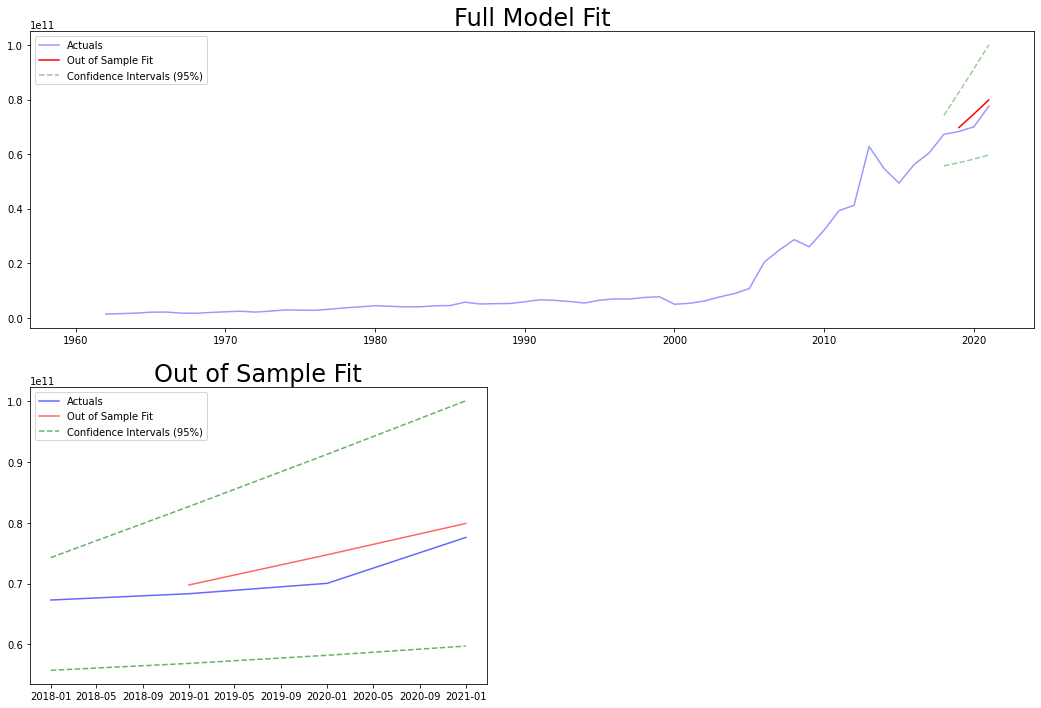

In [80]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["GDP"], color = "blue", label = "Actuals", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit")
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.4)
plt.title("Full Model Fit", size = 24)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(pred_df.loc[test_df.index]["GDP"], color = "blue", label = "Actuals", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.6)
plt.title("Out of Sample Fit", size = 24)
plt.legend()

plt.show()

In [81]:
import pmdarima as pm

smodel = pm.auto_arima(train_df, start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, seasonal=False,
                         d=3, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=2619.511, Time=0.07 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=2686.684, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=2659.533, Time=0.02 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=2610.414, Time=0.07 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=2631.712, Time=0.03 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=2610.923, Time=0.08 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=2598.921, Time=0.09 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=2616.047, Time=0.06 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=2613.764, Time=0.08 sec
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=2642.541, Time=0.07 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=2601.645, Time=0.16 sec
 ARIMA(1,3,2)(0,0,0)[0] intercept   : AIC=2610.287, Time=0.11 sec

Best model:  ARIMA(1,3,2)(0,0,0)[0]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(1, 3, 2)   Log Likelihood               -1295.461
Date:                Sun, 12 Mar 2023   AIC                           2598.921
Time:                        21:46:01   BIC                           2606.950
Sample:                    01-01-1960   HQIC                          2602.026
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1599      0.205     -0.780      0.435      -0.562       0.242
ma.L1         -1.8725      0.298     -6.279      0.000      -2.457      -1.288
ma.L2          0.8864      0.344      2.580      0.010       0.213       1.560
sigma2      2.238e+19   8.81e-21   2.54e+39      0.000    2.24e+19    2.24e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               224.21
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):             521.71   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+56. Standard errors may be unstable.
"""

## Судя по снижению критерия AIC, модель стала качественнее

In [82]:
from sklearn.model_selection import TimeSeriesSplit

In [83]:
tscv = TimeSeriesSplit(n_splits=3, test_size=7)

In [84]:
train_test_groups = tscv.split(data.GDP) 
for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))

TRAIN size: 41 TEST size: 7
TRAIN size: 48 TEST size: 7
TRAIN size: 55 TEST size: 7


## Волатильность 

 **Volatility** at time **t**  

$Vol(t) = |\frac{Price(t) - Price(t-1)}{Price(t-1)} * 100|$

In [85]:
# data["GDP_vol"] = (data.GDP - data.GDP.shift(1))/data.GDP.shift(1)
data["GDP_vol"] = data.GDP.pct_change(1).mul(100).abs()
data["GDP_vol"].head()

year
1960-01-01          NaN
1961-01-01     0.000000
1962-01-01    13.578826
1963-01-01    11.448835
1964-01-01    12.363636
Name: GDP_vol, dtype: float64

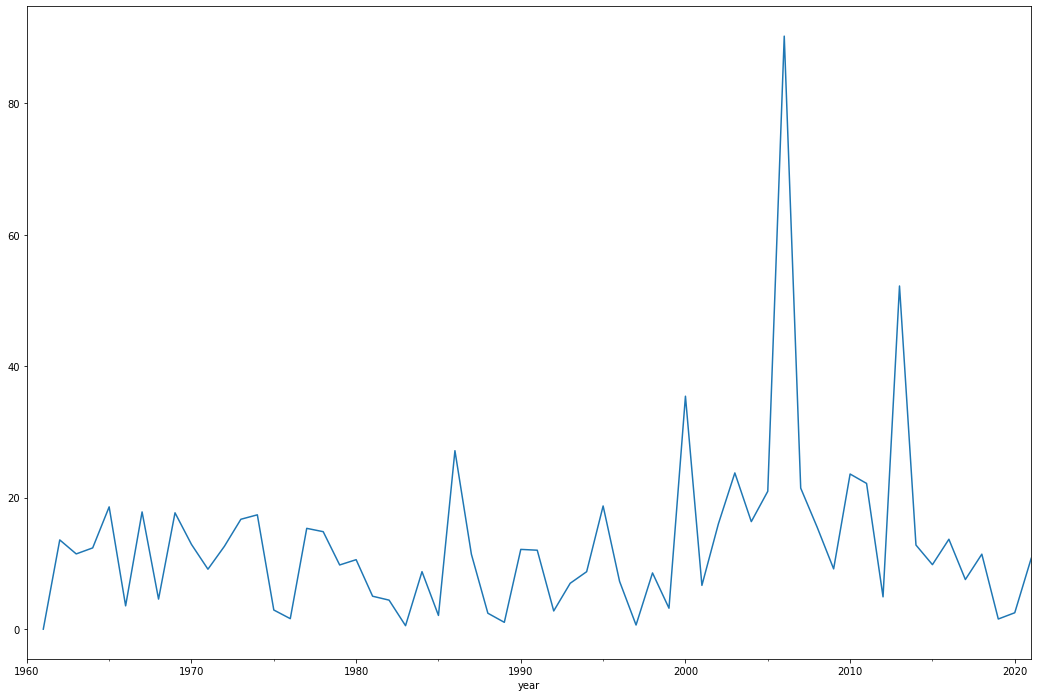

In [86]:
data["GDP_vol"].plot()
plt.show()

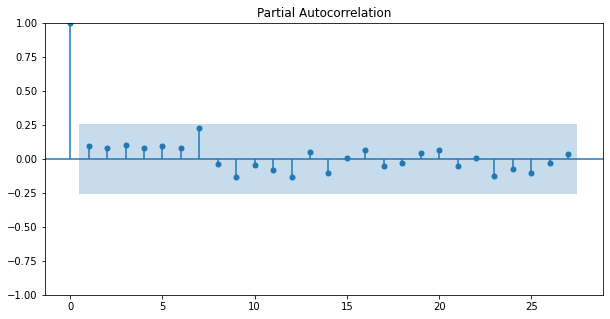

In [89]:
from matplotlib import pyplot as plt

train_df = data.loc[:"2017-12-31"]
test_df = data.loc["2018-01-01":]

plt.rcParams["figure.figsize"] = 10, 5

sgt.plot_pacf(train_df.GDP_vol[1:], lags=27, method="ywm")
plt.show()

In [90]:
adfuller(train_df.GDP_vol[1:])

(-6.7508257816686195,
 2.9541610383588006e-09,
 0,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 375.4784266194796)

Глядя на графики PACF для доходности и волатильности, становится ясно, что самый значтельный - 1 лаг, а затем уровни значимости значительно падают. Итак, мы построим модель GARCH(1, 2).

In [91]:
# нам важно сохранить объем датасета, поэтому берем за исходные данные весь датасет с индексами, который содержит
# и train и test часть
garch_df = pd.DataFrame(data["GDP_vol"].loc[data.index])

# далее необходимо использовать актуальные обучающие данные, которые находятся в выборке train_df.
# Мы никак не преобразовывали нашу обучющую выборку, поэтому фактически, train_df совпадает с данными в data,
# Но если вы применяете к вашей обечающей выборке какие либо преобразования, например скользящее среднее
# для сглаживания, то необходимо передать измененный train_df датасет.

garch_df.loc[train_df.index, "GDP_vol"] = train_df["GDP_vol"].dropna()

In [92]:
from arch import arch_model

model = arch_model(garch_df["GDP_vol"].dropna(), p=1, q=2)

# в параметре last_obs указываем последний объект, до которого будем совершать обучение.
# в нашем случае это до первого объекта из test выборки

model_results = model.fit(last_obs=test_df.index[0], update_freq=5)

Iteration:      5,   Func. Count:     34,   Neg. LLF: 225.74059858789403
Iteration:     10,   Func. Count:     64,   Neg. LLF: 223.8412249748177
Iteration:     15,   Func. Count:     94,   Neg. LLF: 223.82971279197145
Iteration:     20,   Func. Count:    124,   Neg. LLF: 223.74760804027747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 223.74715756040504
            Iterations: 24
            Function evaluations: 142
            Gradient evaluations: 23


In [93]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                GDP_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -223.747
Distribution:                  Normal   AIC:                           457.494
Method:            Maximum Likelihood   BIC:                           467.710
                                        No. Observations:                   57
Date:                Sun, Mar 12 2023   Df Residuals:                       56
Time:                        21:52:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            12.3649      2.692      4.594  4.358e-06 [  7.089, 17.641]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.6898     17.544      0.210      0.833 [-30.695, 38.075]
alpha[1]       0.0000      0.132      0.000      1.000 [ -0.259,  0.259]
beta[1]        1.0000      0.857      1.167      0.243 [ -0.679,  2.679]
beta[2]    1.4629e-10      0.829  1.764e-10      1.000 [ -1.625,  1.625]
========================================================================

Covariance estimator: robust
"""

In [94]:
predictions_df = test_df.copy()
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[
    test_df.index
]

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


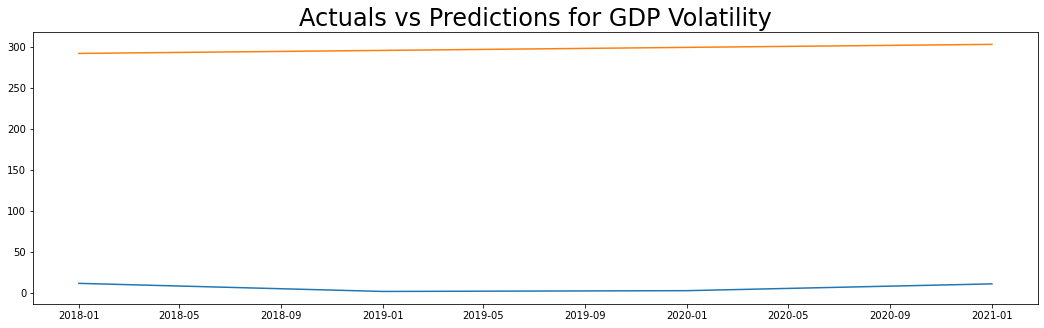

In [97]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(predictions_df["GDP_vol"].abs())
plt.plot(predictions_df["Predictions"])

plt.title("Actuals vs Predictions for GDP Volatility", size=24)

plt.show()

In [99]:
import numpy as np
from sklearn.metrics import mean_squared_error

mean_squared_error(
    predictions_df["GDP_vol"].abs(), predictions_df["Predictions"]
)

84592.74481235261

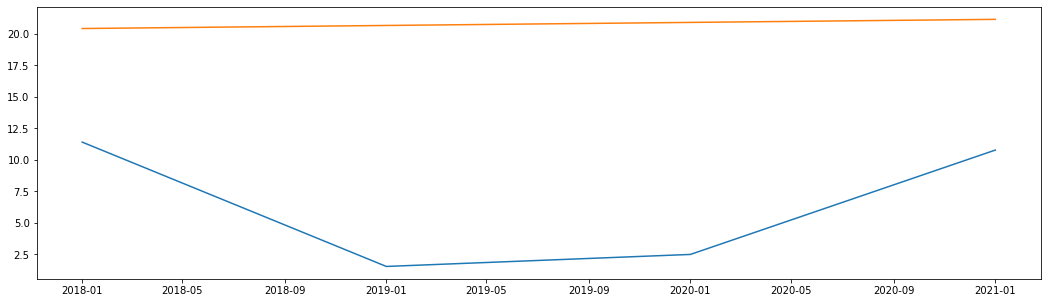

In [100]:
from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(range(data["GDP_vol"].shape[0]))[
    : train_df.shape[0]
].fillna(0)
X_test = pd.DataFrame(range(data["GDP_vol"].shape[0]))[
    train_df.shape[0] :
].fillna(0)
y_train = train_df["GDP_vol"].fillna(0)
y_test = test_df["GDP_vol"].fillna(0)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)


plt.plot(y_test)
plt.plot(pd.Series(lr_predict, index=y_test.index))
plt.show()

## PROPHET

In [101]:
import pandas as pd

from prophet import Prophet

url = 'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'

df = pd.read_csv(url)

df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [102]:
model = Prophet()
model.fit(df)

21:58:41 - cmdstanpy - INFO - Chain [1] start processing
21:58:43 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
future_df = model.make_future_dataframe(periods=365)

future_df.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [105]:
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204233,7.453006,8.903262
3266,2017-01-16,8.529241,7.752476,9.247556
3267,2017-01-17,8.316651,7.578542,8.971366
3268,2017-01-18,8.149239,7.414668,8.826211
3269,2017-01-19,8.161151,7.368484,8.887199


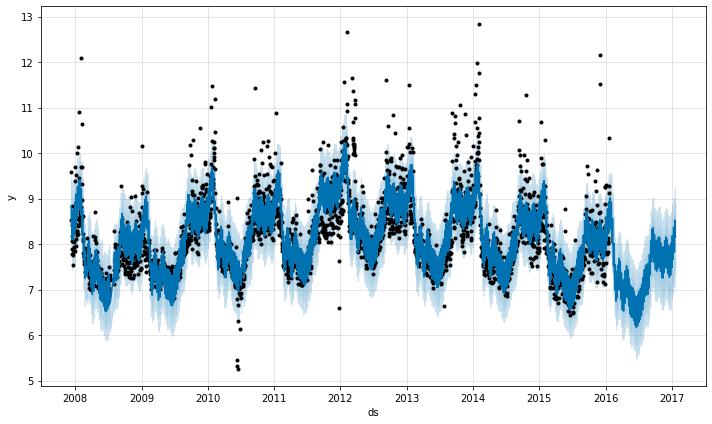

In [106]:
fig = model.plot(forecast_df)

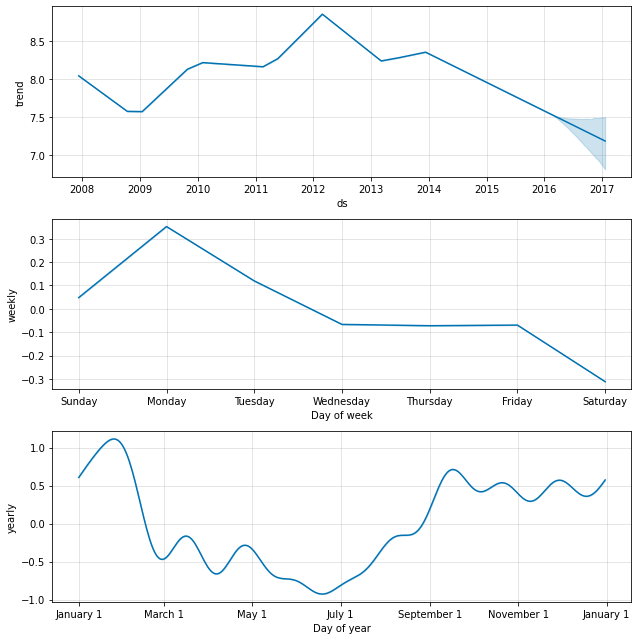

In [107]:
fig = model.plot_components(forecast_df)